In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statistics import median
from scipy.spatial.distance import cdist
import os
import warnings
warnings.filterwarnings('ignore')

duration_data = pd.read_pickle('DataFrames/duration_data.dat')
classification = pd.read_csv('DataFrames/classification_Swift.txt', index_col='GRBname')
group = classification.groupby(classification.type)
swift_short = group.get_group('S')
swift_long = group.get_group('L')
swift_s = [d for d in duration_data.loc[swift_short.index,'T90']]
swift_l = [d for d in duration_data.loc[swift_long.index,'T90']]

path = 'Dropbox/jackson/tsne_maps_swift/'
counts = {grb:[0,0] for grb in pd.read_pickle('non_fft_dataset.dat').index}
miscat = []
files_included = 0
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Dark2.colors)

#for file in os.listdir(path):
for i in range(3000):
    file = f'embedding_TSNE_Swift{i}.csv'
    if file == 'embedall.csv':
        continue
    emb = pd.read_csv(path+file,header=None,index_col=0)
    long = int(len(emb.groupby(emb.iloc[:,2]).get_group(1)) > len(emb.groupby(emb.iloc[:,2]).get_group(0)))
    emb.iloc[:,2] = emb.replace({long:1,1-long:0}).iloc[:,2]
    cut = classification.loc[emb.index]
    
    group = emb.groupby(emb.iloc[:,2])
    sample_short = group.get_group(0).iloc[:,:2]
    sample_long = group.get_group(1).iloc[:,:2]
    sample_s = [d for d in duration_data.loc[sample_short.index,'T90']]
    sample_l = [d for d in duration_data.loc[sample_long.index,'T90']]
    
    res_s = st.ks_2samp(swift_s,sample_s)
    #res_ad_s = st.anderson_ksamp([swift_s,sample_s])
    res_l = st.ks_2samp(swift_l,sample_l)
    #res_ad_l = st.anderson_ksamp([swift_l,sample_l])
    
    min_dist = cdist(sample_short, sample_long).min()
    short_diff = abs(len(classification.loc[emb.index].groupby(classification.loc[emb.index].type).get_group('S')) - len(sample_short))
    
    if min(res_s.pvalue,res_l.pvalue) < 0.2 or min_dist < 0 or short_diff > 10:
        #fig, axs = plt.subplots(1,3,layout='constrained',figsize=[12,4])
        #fig.suptitle(file, size=16)
        #axs[0].scatter(emb[1],emb[2],s=5,c=emb[3].replace({1: 'C4', 0: 'C1'}),alpha=0.5)
        #axs[0].scatter(emb[1],emb[2],s=5,c=classification.replace({'L': 'C4', 'S': 'C1'}).loc[emb.index].type,alpha=0.5)
        #axs[0].set_title(f'min_dist = {np.round(min_dist,2)}, short_diff = {short_diff}')
        #axs[1].hist(np.log10(duration_data.loc[swift_short.index,'T90']), range = (-3,3), bins = 45, color = 'C1', edgecolor = 'C1', alpha = 0.5)
        #axs[1].hist(np.log10(duration_data.loc[sample_short.index,'T90']), range = (-3,3), bins = 45, color = 'C4', edgecolor = 'C4', alpha = 0.5)
        #axs[1].legend(['Swift','Sample'])
        #axs[1].text(-3, 15, "p = {:.3}".format(res_s.pvalue), fontsize=12)
        #axs[1].set_title('short')
        #axs[2].hist(np.log10(duration_data.loc[swift_long.index,'T90']), range = (-1,4), bins = 45, color = 'C1', edgecolor = 'C1', alpha = 0.5)
        #axs[2].hist(np.log10(duration_data.loc[sample_long.index,'T90']), range = (-1,4), bins = 45, color = 'C4', edgecolor = 'C4', alpha = 0.5)
        #axs[2].legend(['Swift','Sample'])
        #axs[2].text(-1, 80, "p = {:.3}".format(res_l.pvalue), fontsize=12)
        #axs[2].set_title('long')
        #plt.show()
        continue
    
    miscat.append(len(sample_short[~sample_short.index.isin(swift_short.index)])+len(sample_long[~sample_long.index.isin(swift_long.index)]))
    
    for i in range(emb.index.size):
        row = emb.iloc[i]
        counts[row.name][int(row[3])] += 1
    files_included += 1

In [2]:
df = pd.DataFrame(counts).T
df[3] = df.max(axis=1)/df.sum(axis=1)
df.columns = ['S', 'L', '%']
print(f'Number of files included: {files_included}')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

Number of files included: 550


,S,L,%
GRB041217,0,233,1.000000
GRB041219C,0,269,1.000000
GRB041220,0,251,1.000000
GRB041223,0,249,1.000000
GRB041224,0,242,1.000000
GRB041226,0,251,1.000000
GRB041228,0,238,1.000000
GRB050117,0,236,1.000000
GRB050124,5,252,0.980545
GRB050126,0,271,1.000000


In [3]:
display(df[df.loc[:,'%'] < 1])

,S,L,%
GRB050124,5,252,0.980545
GRB050416A,35,214,0.859438
GRB050416B,1,220,0.995475
GRB050603,2,250,0.992063
GRB050724,24,220,0.901639
...,...,...,...
GRB190610A,224,40,0.848485
GRB191004A,86,130,0.601852
GRB200131A,4,248,0.984127
GRB200716C,102,128,0.556522


In [4]:
#df.loc['GRB061006']
#df.loc['GRB061210']
#df.loc['GRB111121A']
df.loc['GRB200716C']

S    102.000000
L    128.000000
%      0.556522
Name: GRB200716C, dtype: float64

(array([2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 5.000e+00, 4.000e+00,
        1.000e+01, 1.100e+01, 1.300e+01, 1.272e+03]),
 array([0.50934579, 0.55841121, 0.60747664, 0.65654206, 0.70560748,
        0.7546729 , 0.80373832, 0.85280374, 0.90186916, 0.95093458,
        1.        ]),
 <BarContainer object of 10 artists>)

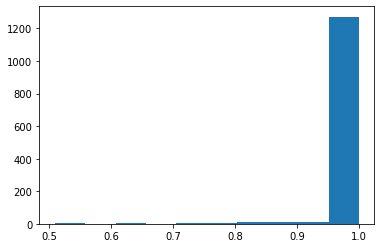

In [5]:
plt.hist(df.loc[:,'%'])

In [6]:
print('proportion of objects below 100% stability: ' + str(round(100*len(df[df.loc[:,'%'] < 1])/len(classification.index), 1)) + '%')
print('proportion of objects below 90% stability: ' + str(round(100*len(df[df.loc[:,'%'] < 0.9])/len(classification.index), 1)) + '%')
print('median percentage of objects that change classification: ' + str(round(100*median(miscat)/600, 1)) + '%')

proportion of objects below 100% stability: 8.9%
proportion of objects below 90% stability: 2.6%
median percentage of objects that change classification: 0.5%


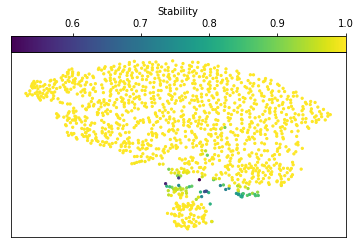

In [7]:
emb_n = pd.read_csv("embedding_TSNE_20.csv", header = None, index_col = 0)
emb_plot = plt.scatter(emb_n[1], emb_n[2], s=5, c=df.loc[:,'%'])
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar(emb_plot, label = 'Stability', location = 'top', pad = 0)
#df.to_pickle('DataFrames/stability_Swift.dat')
#plt.savefig('stability_Swift.jpg', dpi=300)

In [8]:
df.loc[pd.read_csv('DataFrames/mismatching_classifications.csv').Swift]

,S,L,%
GRB090531B,0,241,1.000000
GRB090927,18,240,0.930233
GRB130716A,0,251,1.000000
GRB131004A,45,188,0.806867
GRB140209A,137,64,0.681592
GRB140320A,253,0,1.000000
GRB141205A,46,133,0.743017
GRB150120A,35,205,0.854167
GRB170318B,238,19,0.926070


In [9]:
df.loc[['GRB050724','GRB121226A','GRB180418A']]

,S,L,%
GRB050724,24,220,0.901639
GRB121226A,173,38,0.819905
GRB180418A,124,76,0.620000
